
# CSCE633 Fall 2022
# Machine Learning Homework 2

Total 100 pts

Instructor: Yoonsuck Choe

September 14, 2022



**Student name:** Mukherjee Debajoy

---


# Common instructions (Read carefully)

Hint: Go to View $\rightarrow$ Collapse sections to quickly jump to the problems you are working on. 

**Submission:**

1. Rename the file to **633-22Fall Machine Learning HW2 - lastname firstname.ipynb**.
2. After you complete each section, "Save and pin" the revision. (**File -> Save and pin revision**). 
> There will be a 20-point penalty for not including revision history in the submission as instructed below.
3. When you're ready to submit, 
> 1. download the ipynb file (**File -> Download .ipynb**).
> 2. take screenshot of revision history, by comparing each successive pinned revisions (there will be several of these: final vs. latest pin, latest pin vs. previous pin, etc.). (**File -> Revision history**, then click on the radio buttons for pinned revisions to compare. Scroll down to the part that shows the major revised part, and take a screenshot. No need to show the entire revision history.)
>> Important: Unselect "[ ] Show output" to suppress diff of execution outputs.
>> Jupyter notebook: If you're using Jupyter notebook on your local machine, run %history -g -f filename.log  and submit the log file. 
> 3. submit a zip file **lastname-firstname.zip** containing the ipynb file and all revision screenshots.

**Using the markdown language in the "text" boxes:**

Note: See https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0 for how to use the markdown when writing your answer in the text boxes.


**NEW: Including images/screenshots**

When including screenshots directly into the text cell, the markup source can get too long. To avoid this, you can upload your images to google drive, make them publicly viewable, get the share link, get the id string  from the link (for example, 1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy), and insert a tag like below:  
```
<img src="https://drive.google.com/uc?export=view&id=1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy"> 
```



# Section I. Deterministic Case (total 70 points)

---



Consider the following reinforcement learning problem.

<figure>
<center>
<img src="https://github.com/yschoe/pub-data/blob/main/grid-goal2-v2.png?raw=true">
<figcaption>Figure 1</figcaption></center>
</figure>


*   There are 12 states, and the actions are $\{ up, down, left, right \}$. Legal actions are those that go to the immediate neighbor, horizontally or vertically (but not diagonally). State $s_2$ is the goal state, and all actions here lead back to itself with reward 0.

*   The rewards for all action are 0, except for all actions that lead into $s_2$, which are 100 (as shown in the figure).

*   In all cases, assume $\gamma = 0.9$.

* Initially, all $Q(s,a) = 0$.




# Problem 1 (Written: 10pts)

**Problem 1 (Written: 10pts):**

Consider the state action sequence of ($s_9$,up), ($s_5$, right), ($s_6$, up), and suppose the $Q(s,a)$ values were updated during each move. 

(1) With initial $Q(s,a)=0$ for all $(s,a)$, after one such pass, what would the resulting $Q(s,a)$ values be? 
* Note: Since one such pass has three actions, three $Q(s,a)$ values will be updated. 
* Note: Some values may be updated from 0 to 0, but this still counts as an update.  

(2) After two such passes, what would be the resulting $Q(s,a)$ values?

(3) After three such passes, what would be the resulting $Q(s,a)$ values?

(4) After four such passes, what would be the resulting $Q(s,a)$ values?


**Answer**

(1) After one pass the Q values will be updated as:

    Q(s9,up) = 0 + 0.9 * max(0,0,0,0) = 0 
    Q(s5,right) = 0 + 0.9* max(0,0,0,0) = 0
    Q(s6,up) = 100+0.9*max(0) = 100 

(2) After 2nd pass the Q values will be updated as:
  
    Q(s9,up) = 0 + 0.9* max(0,0,0,0) = 0
    Q(s5,right) = 0 + 0.9* max(0,0,0,100) = 90
    Q(s6,up) = 100 +0.9*max(0) = 100

(3) After the 3rd pass the Q values will be updated as:
    
    Q(s9,up) = 0 + 0.9*max(0,0,0,90) = 81
    Q(s5,right) = 0 + 0.9*max(0,0,0,100) = 90
    Q(s6,up) = 100+max(0) = 100

(4) After the 4th pass the Q values will be:

    Q(s9,up) = 0 + 0.9*max(0,0,0,90) = 81
    Q(s5,right) = 0 + 0.9*max(0,0,0,100) = 90
    Q(s6,up) = 100+max(0) = 100






# Problem 2 (Written: 10pts)

**Problem 2 (Written: 10pts):**

(1) Manually compute the optimal $V^*(s)$ for all states $s_0, s_1, ... s_{11}$. See slide04.pdf, page 14. 

* The optimal policy $\pi^*$ is pretty straight-forward: Action that takes you to the next state that is one of the shortest path to the goal state (there could be one, or two or more such paths, depending on yout start state). 

* It is best if you start from $s_2$ and work backward: $s_2$, then all states that can reach $s_2$ in one move (they are $s_1, s_3, s_6$), then all states that can reach $s_2$ in two moves, etc. 

* Hint: based on how many moves a state $s$ is away from the goal state, $V^*(s)$ has a form of $0 + \gamma 0 + \gamma^2 0 + \gamma^3 100 + \gamma^4 0 + ... = 0 + 0 + 0 + \gamma^3 100 + 0 + 0 + ... = \gamma^3 100 = 0.9^3 * 100 = 72.9$ (in case of four moves).  

(2) Manually compute the optimal $Q(s,a)$ for all $(s,a)$. See slide04.pdf, page 26. You can quickly and directly compute this from $V^*(s)$ above, and the $r(s,a)$ (Figure 1). No need to recursively evaluate $Q(s,a)$. 

* Note: $Q(s,a) = r(s,a) + \gamma V^*(\delta(s,a))$



**Answer**

(1)
$V^*(s) = $

>s | $V^*(s)$ 
> ---      | ---
> $s_0$    | 0+100*0.9 = 90
> $s_1$    | 100
> $s_2$    | 0
> $s_3$    | 100
> $s_{4}$  | 0+0+0.9*0.9*100 = 81
> $s_{5}$  | 0+0.9*100 = 90
> $s_{6}$  | 100
> $s_{7}$  | 0+0.9*100 = 90
> $s_{8}$  | 0+0+0+0.9*0.9*0.9*100 = 72.9
> $s_{9}$  | 0+0+0.9*0.9*100 = 81
> $s_{10}$ | 0+0.9*100 = 90
> $s_{11}$ | 0+0+0.9*0.9*100 = 81


(2)

$Q(s,a) = $

>Q(s,a)    | up      | down         | left      | right  
> ---      | ---     | ---          | ---       | ---
> $s_0$    | #       | 0+0.9*81=72.9 |# | 0+0.9*100=90
> $s_1$    | #       | 0+0.9*90=81| 0+0.9*90=81| 100+0=100
> $s_2$    | #       |  #         |    #       | #
> $s_3$    | #       |  0+0.9*90=81 | 100+0=100| #
> $s_4$    | 0+0.9*90 =81|0+0.9*72.9=65.61|#|0+0.9*90=81
> $s_5$    | 0+0.9*100=90|0+0.9*81=72.9|0+0.9*81=72.9|0+0.9*100 =90 
> $s_6$    |100+0=100|0+0.9*90=81|0+0.9*90=81|0+0.9*90=81 
> $s_7$    |0+0.9*100=90|0+0.9*81=72.9|0+0.9*100=90|#
> $s_8$    |0+0.9*81=72.9|#|#|0+0.9*81=72.9
> $s_9$    |0+0.9*90=81|#|0+0.9*72.9=65.61|0+0.9*90=81 
> $s_{10}$ |0+0.9*100=90|#|0+0.9*81=72.9|0+0.9*81=72.9 
> $s_{11}$ |0+0.9*90=81|#|0+90*0.9=81| #



# Problem 3 (Program: 20pts)

**Problem 3 (Program: 20 pts):**

Modify the fully functioning Q-learning algorithm in the code cell below, to learn the $Q(s,a)$ values for the above
example (Figure 1). Use the algorithm in slide04.pdf, Page 22. Note: There are slight differences between the slide and the fully functioning code below. Use the code below as the definitive reference. 

* First, try a fixed number of iterations to train. You will have to experiment with different numbers for this.  
* Next, you have to find out what stopping criterion to use. The code below shows a fixed number of iterations. Change it to something that measures convergence. 
  * For example, observe the sum of difference in the entire $Q$ table from step $n-1$ to step $n$: $\sum_{s,a \in S,A} | Q_n(s,a) - Q_{n-1}(s,a)|$, and stop when the difference drops below a certain level (try 0.01 first, and lower or raise it). You have to find this out empirically.
  * Alternatively, you can try checking the running average of the above Q table difference against a threshold. Code for this running average is already included. You can control the running average rate by adjusting ```args.run_avg_rate```.   
* Use a random policy to select action $a$ given current random state $s$ (note: this is also different from the slide). You will find that this can be achieved by just setting the ```args.epsilon``` parameter in the provided code.

(1) Directly modify the code below.

(2) Show resulting Q table ($12 \times 4$ matrix: 12 rows, 4 columns).

* Rows represent states and columns represent actions.
* Row ordering should be $s_0, s_1, s_2, ... , s_{11}$, from top to bottom.
* Column ordering should be $up, down, left, right$, from left to right. 
* **Note: do not change the above ordering! You will be penalized if you do so.**
* Set (s,a) of Q and other matrices to $-1$ to mark illegal moves. 

(3) Write a new function to compute the $V(s)$ values for all $s_0, s_1, ... , s_{11}$, from the resulting $Q(s,a)$ values. Print the $V(s)$ values as a column vector (rows 0 to 11, for $V(s_0), V(s_2), ...V(s_11)$). 

(4) Show a plot showing the running average of $\sum_{s,a \in S,A} | Q_{t+1}(s,a) - Q_t(s,a)|$ over the iterations.

(5) Compare the outcomes above with the V values and the Q table you manually calculated in problem 2.

*). Note: This problem is mostly an exercise of just changing the environment (state transition matrix, and the reward matrix, according to Figure 1). Most of the requirement above, including the Q-table print out, computing the running average of difference in Q over time, and the plotting of the running average are already in the code. Read the instructions at the top of the code cell below, and try running it with different parameters to get your self familiarized with the code. Then change the "Environment set up" section where it is marked with "modify". The only real code you need to write is to write the function for computing $V(s)$. 




Delta
     up  down  left  right
s0   -1     4    -1      1
s1   -1     5     0      2
s2    2     2     2      2
s3   -1     7     2     -1
s4    0     8    -1      5
s5    1     9     4      6
s6    2    10     5      7
s7    3    11     6     -1
s8    4    -1    -1      9
s9    5    -1     8     10
s10   6    -1     9     11
s11   7    -1    10     -1


Reward
      up  down  left  right
s0     0     0     0      0
s1     0     0     0    100
s2     0     0     0      0
s3     0     0   100      0
s4     0     0     0      0
s5     0     0     0      0
s6   100     0     0      0
s7     0     0     0      0
s8     0     0     0      0
s9     0     0     0      0
s10    0     0     0      0
s11    0     0     0      0


Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8 

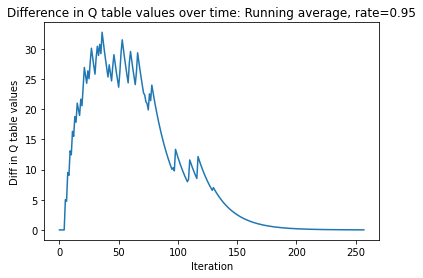

diff in Q reached below 0.01 at iteration = 258


In [ ]:
#!/usr/bin/python

# qlearn.py : simple discrete, deterministic Q-learning 
#
# Requires: numpy, pandas, matplotlib
#
# Yoonsuck Choe
# choe@tamu.edu
#
# 2021. 02. 17. (wed) 09:00:58 KST
# 2021. 02. 18. (thu) 00:09:00 KST
# 2022. 09. 14. (wed) 12:54:00 CST
#
# Getting started:
# 
# - pick between "console" mode (for command line) or "notebook" mode (for colab, etc). 
#     See the config section.
# 
#     mode  = "console"
#
# Suggested experiments:
#
# - change epsilon: 
#     0.1, 0.25, 0.5 (default), 0.8, 1.0 and see how the Q diff plot looks like (how fast 
#     learning converges.
#    
#     ./qlearn.pl --epsilon=0.25 
#
#     or, for notebook mode
# 
#     args.epsilon = 0.25
#     qlearn()
# 
# - change alpha: 
#     0.1, 0.25, 0.5, 0.8, 1.0 (default) and see how the Q diff plot looks like (how fast 
#     learning converges.
# 
#     ./qlearn.pl --alpha=0.25 
# 
#     or, for notebook mode
# 
#     args.alpha= 0.25
#     qlearn()
# 
# - try a new grid world environment (change section below "Environment set up".
#     search for "modify"
#
#

import numpy as np
import pandas as pd
import random 
import argparse, sys
import matplotlib.pyplot as plt

#--------------------
# config (more config below : search for "modify" 
#
# - for colab, etc, use the "notebook" mode
#--------------------

# mode = "console"
mode = "notebook" 

#--------------------
# console mode: process command line arguments
#--------------------
def parse_args():

  cmd = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
  cmd.add_argument('--alpha', type=float, default="1.0", help="mixing rate")
  cmd.add_argument('--gamma', type=float, default="0.9", help="discount rate")
  cmd.add_argument('--epsilon', type=float, default="0.5", help="discount rate")
  cmd.add_argument('--num_iter', type=int, default="300", help="number of iterations to run")
  cmd.add_argument('--run_avg_rate', type=float, default="0.95", help="number of iterations to run")
  cmd.add_argument('--display_flag', type=str, default="True", help="display Q table after each iteration")
  cmd.add_argument('--run_avg_threshold', type=float, default="0.01", help="run average threshold for training loop termination")

  return cmd.parse_args()

#--------------------
# notebook mode: process command line arguments
#--------------------
class argclass:

  def __init__(self):

    self.alpha = 1.0
    self.gamma = 0.9
    self.epsilon = 0.5
    self.num_iter = 300
    self.run_avg_rate = 0.95
    self.display_flag = "True"
    self.run_avg_threshold = 0.01

#--------------------
# select mode 
#--------------------
if (mode=="console"):

  args = parse_args()

elif (mode=="notebook"):

  args = argclass()

else:

  print("Invalid mode: check the config")
  exit()

#--------------------
# find sum of absolute difference in the two table values
#--------------------
def df_diff(df1, df2):

  d = df1-df2
  return d.abs().to_numpy().sum() 

#----------------------------------------------------------------------------
#
# Environment set up : modify this part to change the environment
#
#----------------------------------------------------------------------------

#--------------------
# state index : modify
#
# layout =  (*) marks the goal. 
# 
# s0 s1 (s2)
# s3 s4 s5 
# 
#   * (s1,right) and (s5,up) has reward 100, all others are 0.
#   * All actions in s2 lead back to s2, with reward 0.
#
#--------------------
s_index = ["s0", "s1", "s2", "s3", "s4", "s5","s6","s7","s8","s9","s10","s11"] 

#--------------------
# state transition table : modify 
#--------------------
delta = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1,-1,2,-1,0,1,2,3,4,5,6,7]),index=s_index),
	  "down" : pd.Series(np.array([4,5,2,7,8,9,10,11,-1,-1,-1,-1]),index=s_index),
	  "left" : pd.Series(np.array([-1,0,2,2,-1,4,5,6,-1,8,9,10]),index=s_index),
	  "right": pd.Series(np.array([1,2,2,-1,5,6,7,-1,9,10,11,-1]),index=s_index)
	}
)

#--------------------
# reward table : modify
#--------------------
reward = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([0, 0,0,0,0,0,100,0,0,0,0,0]),index=s_index),
	  "down" : pd.Series(np.array([ 0,  0,  0, 0, 0, 0,0,0,0,0,0,0]),index=s_index),
	  "left" : pd.Series(np.array([0,  0,  0, 100,0,0,0,0,0,0,0,0]),index=s_index),
	  "right": pd.Series(np.array([ 0,100,0,0,0,0,0,0,0,0,0,0]),index=s_index)
	}
)

print("\n\nDelta")
print(delta)

print("\n\nReward")
print(reward)

#--------------------
# goal state : modify
#--------------------
goal = 2

#----------------------------------------------------------------------------
#
# Main algorithm : no need to modify much below here (for the deterministic case)
#
#----------------------------------------------------------------------------

def qlearn(): 

  # extract number of states
  num_states = len(s_index)
  num_actions = 4
  
  # set up (s,a) visit count
  visits = (delta>=0).astype(int)-1
  run_avg = 0
  
  #--------------------
  # (1) Initialize Q table to zeros (-1 for invalid actions)
  #
  # - Reuse delta table to filter out invalid moves and set others to zero
  #--------------------
 
  Q=(delta>=0).astype(float)-1 

  old_Q = Q.copy(deep=True) 
  
  print("\n\nQ: initial")
  print(Q)
  
  #--------------------
  # (2) Main loop
  #--------------------
  
  d = np.zeros(args.num_iter)
  
  for n in range(args.num_iter):
    
    #----------
    # 1. s : randomly select state   
    #----------
  
    s = random.randint(0,num_states-1)
  
    while (s==goal): # avoid goal state
      s = random.randint(0,num_states-1)
      
    #----------
    # 2. a : choose action (epsilon greedy policy)
    #----------
  
    if (random.random() < (1-args.epsilon)):
  
      # greedy action:
      a = Q.iloc[s,:].argmax()
  
    else:
  
      # random action
      a = random.randint(0,num_actions-1)
  
      while (delta.iloc[s,a]==-1): # avoid invalid action
        a = random.randint(0,num_actions-1)
  
    #----------
    # 3. train
    #----------
  
    visits.iloc[s,a] = visits.iloc[s,a]+1

    alpha = args.alpha
    gamma = args.gamma
  
    # 3.1 find next state from (s,a)
  
    s_next = delta.iloc[s,a]
  
    # 3.2 update Q
  
    # Equation is: Q(s,a) = (1-alpha) x Q(s,a) + alpha*( r(s,a) + gamma * max_a' Q(s',a') )
    Q.iloc[s,a] = ((1.0)-(alpha))*Q.iloc[s,a] + (alpha)*(reward.iloc[s,a] + gamma*Q.iloc[s_next,:].max())
  
  
    # 3.3 compute running average of the sum of Q(n) minus Q(n-1)
  
    d[n] = args.run_avg_rate * run_avg + (1-args.run_avg_rate) * df_diff(Q,old_Q)
    run_avg = d[n]
    old_Q = Q.copy(deep=True)
   


    # 3.3 print current Q and running average of Q diff.
  
    if (args.display_flag == "True"):
  
      print("\nQ : iter="+str(n))
      print(Q)
      print("diff = "+str(d[n]))

    if (n>50  and run_avg < args.run_avg_threshold):
 
        break

  #--------------------
  # (3) Print final Q table  and (s,a) visit count table
  #--------------------
  print("\nFinal Q table\n")
  print(Q)
  
  print("\nFinal visit count table\n")
  print(visits)

  Value = np.zeros(12)
  for i in range(12):
    Value[i] += Q.iloc[i,:].max()
  print("\nThe value array is:")
  print(Value)

  
  #--------------------
  # (4) Plot diff Q(n), Q(n-1) running average
  #--------------------
  plt.title("Difference in Q table values over time: Running average, rate="+str(args.run_avg_rate))
  plt.xlabel("Iteration")
  plt.ylabel("Diff in Q table values")
  plt.plot(d[:n])
  plt.show()

  if run_avg < args.run_avg_threshold:
    print(f"diff in Q reached below {args.run_avg_threshold} at iteration = {n}")
  else:
    print(f"training terminated with iteration {n} with diff in q value {run_avg} above threshold {args.run_avg_threshold}")

#-- end of qlearn() function def

#----------------------------------------------------------------------------
# Run the qlearn main function
#
# - if you're using notebook mode, you can change the argument and rerun
#   in the interactive session (create a new cell and put the following lines in it).
#   
#    args.epsilon = 0.8
#    qlearn()
#
#----------------------------------------------------------------------------

args.display_flag = "False"  # Set this to True to see the changing Q table over time.
args.epsilon = 1.0
qlearn()

# after you run it, check if your Delta (state transition table) and the Reward table are accurate, compared to Figure 1. 



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up  down   left  right
s0    -1.0   0.0   -1.0    0.0
s1    -1.0   0.0    0.0    0.0
s2     0.0   0.0    0.0    0.0
s3    -1.0  81.0  100.0   -1.0
s4     0.0   0.0   -1.0    0.0
s5     0.0   0.0    0.0    0.0
s6   100.0   0.0    0.0   81.0
s7    90.0   0.0   90.0   -1.0
s8     0.0  -1.0   -1.0   72.9
s9     0.0  -1.0    0.0   81.0
s10   90.0  -1.0    0.0    0.0
s11   81.0  -1.0   81.0   -1.0

Final visit count table

     up  down  left  right
s0   -1    26    -1      2
s1   -1    23     2      0
s2    0     0     0      0
s3   -1     2    31     -1
s4   22     8    -1      2
s5   20     1   

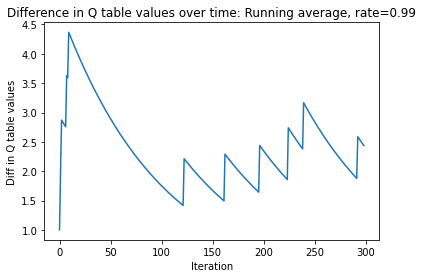

training terminated with iteration 299 with diff in q value 2.411854590944318 above threshold 0.01


In [ ]:
# You can also easily run a different experiment in its own code cell, like below,
# with a different set of parameters

args.epsilon=0.2
args.run_avg_rate = 0.99
qlearn()

**Answer:**

Modify the code cell above to make it to work. 


**EXPERIMENTING WITH NO OF ITERATIONS [100,200,400,500,1000] WITH SAME EPSILON AND ALPHA AS DEFAULT** 



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up  down   left  right
s0    -1.0  72.9   -1.0   90.0
s1    -1.0  81.0   81.0  100.0
s2     0.0   0.0    0.0    0.0
s3    -1.0  81.0  100.0   -1.0
s4    81.0   0.0   -1.0   81.0
s5    90.0  72.9   72.9   90.0
s6   100.0  81.0   81.0   81.0
s7    90.0   0.0    0.0   -1.0
s8     0.0  -1.0   -1.0   72.9
s9    81.0  -1.0    0.0    0.0
s10   90.0  -1.0   72.9   72.9
s11   81.0  -1.0   81.0   -1.0

Final visit count table

     up  down  left  right
s0   -1     3    -1      4
s1   -1     4     8      2
s2    0     0     0      0
s3   -1     4     4     -1
s4    3     0    -1      3
s5    5     1   

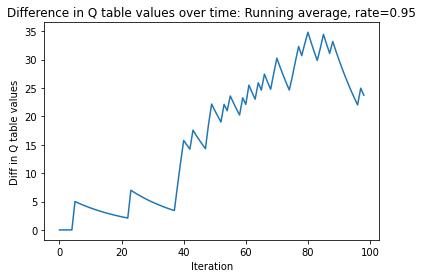

training terminated with iteration 99 with diff in q value 22.526336241597498 above threshold 0.01


In [ ]:
args.epsilon = 1 
args.num_iter = 100
args.run_avg_rate = 0.95
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2     0.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90   72.90   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00    0.00   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1     8    -1     13
s1   -1     6     8      5
s2    0     0     0      0
s3   -1    16    11     -1
s4    7     4    

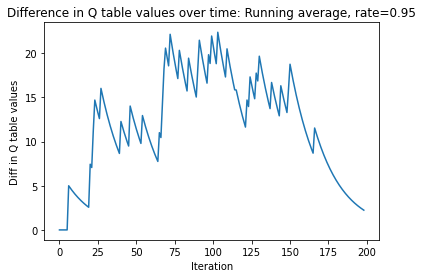

training terminated with iteration 199 with diff in q value 2.123089267606083 above threshold 0.01


In [ ]:
args.num_iter = 200
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2     0.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90   72.90   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1    15    -1     16
s1   -1    13    10      8
s2    0     0     0      0
s3   -1    19     9     -1
s4   13     6    

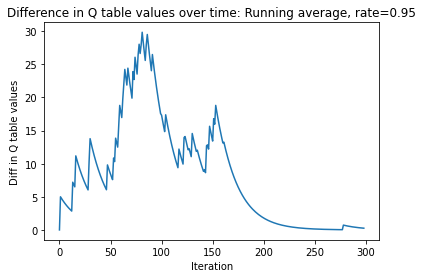

training terminated with iteration 299 with diff in q value 0.2470180164280485 above threshold 0.01


In [ ]:
args.num_iter = 300
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2     0.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90   72.90   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1     7    -1     11
s1   -1     7    11     15
s2    0     0     0      0
s3   -1     9    12     -1
s4   12     6    

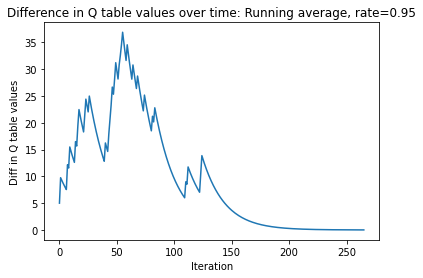

diff in Q reached below 0.01 at iteration = 266


In [ ]:
args.num_iter = 400
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2     0.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90   72.90   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1    10    -1     10
s1   -1     6    14     13
s2    0     0     0      0
s3   -1    10    16     -1
s4   18     9    

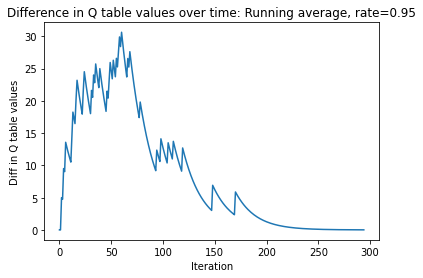

diff in Q reached below 0.01 at iteration = 295


In [ ]:
args.num_iter = 500
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2     0.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90   72.90   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1    14    -1     11
s1   -1     6    14     11
s2    0     0     0      0
s3   -1     9     9     -1
s4   10     7    

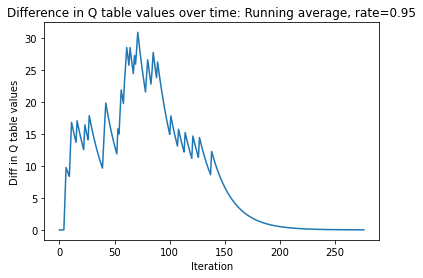

diff in Q reached below 0.01 at iteration = 277


In [ ]:
args.num_iter = 1000
qlearn()

**LETS NOW EXPERIMENT THE STOPPING CRITERIA**

***1. WE EXPERIMENT WITH 3 VALUES OF RUN_AVERAGE RATE***

***2. WE MODIFY THE STOPPING CONDITION AS MENTIONED ABOVE***



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up  down   left  right
s0    -1.0   0.0   -1.0    0.0
s1    -1.0   0.0    0.0  100.0
s2     0.0   0.0    0.0    0.0
s3    -1.0   0.0  100.0   -1.0
s4     0.0   0.0   -1.0    0.0
s5     0.0   0.0    0.0    0.0
s6   100.0   0.0    0.0    0.0
s7     0.0   0.0    0.0   -1.0
s8     0.0  -1.0   -1.0    0.0
s9     0.0  -1.0    0.0    0.0
s10    0.0  -1.0    0.0    0.0
s11    0.0  -1.0    0.0   -1.0

Final visit count table

     up  down  left  right
s0   -1     2    -1      2
s1   -1     3     0      1
s2    0     0     0      0
s3   -1     1     4     -1
s4    2     2    -1      3
s5    0     2   

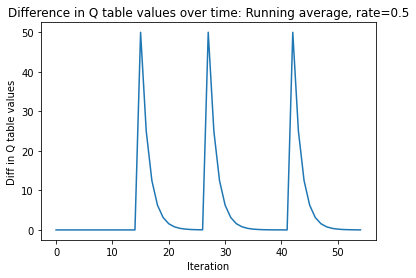

diff in Q reached below 0.01 at iteration = 55


In [ ]:
#bring no of iterations to 300 since it converged 
args.num_iter = 300
args.run_avg_rate = 0.5
qlearn()

*Obviously this is not performing well*



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2     0.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90   72.90   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1    20    -1     15
s1   -1    11    10     10
s2    0     0     0      0
s3   -1    17    14     -1
s4    8     8    

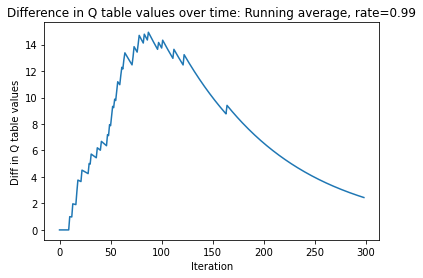

training terminated with iteration 299 with diff in q value 2.4220892410277166 above threshold 0.01


In [ ]:
args.run_avg_rate = 0.99
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2     0.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90    0.00   72.9
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   72.90   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1    13    -1     11
s1   -1     7     4      5
s2    0     0     0      0
s3   -1     5     3     -1
s4    7     4    

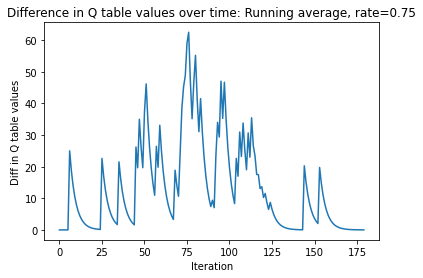

diff in Q reached below 0.01 at iteration = 180


In [ ]:
args.run_avg_rate = 0.75
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2     0.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90   72.90   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1    11    -1     16
s1   -1     9    12      4
s2    0     0     0      0
s3   -1     9    16     -1
s4   11    11    

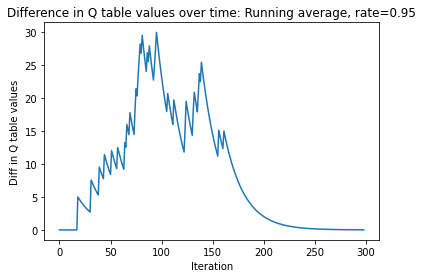

training terminated with iteration 299 with diff in q value 0.012627016133940827 above threshold 0.01


In [ ]:
args.run_avg_rate = 0.95
qlearn()

Experimentation on the basis of alpha and epsilon



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up  down   left  right
s0    -1.0   0.0   -1.0   90.0
s1    -1.0  81.0    0.0  100.0
s2     0.0   0.0    0.0    0.0
s3    -1.0  81.0  100.0   -1.0
s4    81.0   0.0   -1.0    0.0
s5    90.0   0.0    0.0    0.0
s6   100.0  81.0    0.0   81.0
s7    90.0   0.0    0.0   -1.0
s8     0.0  -1.0   -1.0   72.9
s9    81.0  -1.0    0.0    0.0
s10   90.0  -1.0    0.0   72.9
s11   81.0  -1.0    0.0   -1.0

Final visit count table

     up  down  left  right
s0   -1    18    -1      4
s1   -1     9     4     21
s2    0     0     0      0
s3   -1     2    25     -1
s4   23     0    -1      0
s5   30     0   

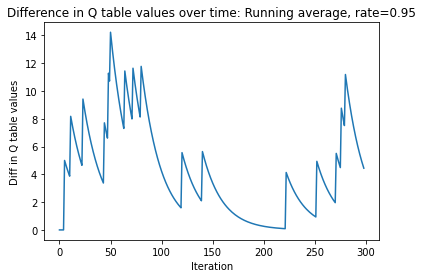

training terminated with iteration 299 with diff in q value 4.221366656817223 above threshold 0.01


In [ ]:
args.epsilon = 0.1
args.num_iter = 300
args.run_avg_rate=0.95
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down     left  right
s0    -1.0   0.00   -1.000   90.0
s1    -1.0  81.00    0.000  100.0
s2     0.0   0.00    0.000    0.0
s3    -1.0  81.00  100.000   -1.0
s4     0.0  65.61   -1.000   81.0
s5    90.0  72.90   59.049    0.0
s6   100.0  81.00   81.000    0.0
s7    90.0   0.00   90.000   -1.0
s8    72.9  -1.00   -1.000   72.9
s9    81.0  -1.00   65.610   81.0
s10   90.0  -1.00   72.900   72.9
s11   81.0  -1.00   81.000   -1.0

Final visit count table

     up  down  left  right
s0   -1    13    -1     16
s1   -1     4     1     13
s2    0     0     0      0
s3   -1     8    24     -1
s4  

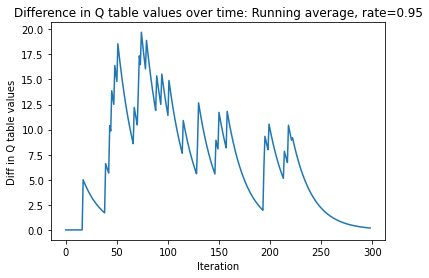

training terminated with iteration 299 with diff in q value 0.1770748351088569 above threshold 0.01


In [ ]:
args.epsilon = 0.25
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2     0.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90   72.90   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1     8    -1     19
s1   -1     4     4     18
s2    0     0     0      0
s3   -1    10    21     -1
s4   21     2    

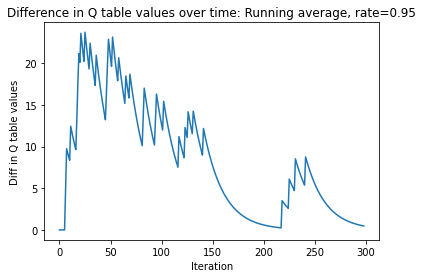

training terminated with iteration 299 with diff in q value 0.44689105068409135 above threshold 0.01


In [ ]:
args.epsilon = 0.5
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2     0.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00    0.0
s5    90.0  72.90   72.90   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1    11    -1     13
s1   -1    10     7     12
s2    0     0     0      0
s3   -1    14    21     -1
s4   14     8    

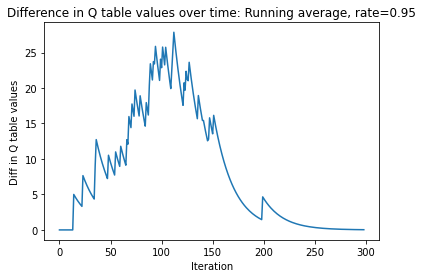

training terminated with iteration 299 with diff in q value 0.027572008614358167 above threshold 0.01


In [ ]:
args.epsilon = 0.8
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2     0.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90   72.90   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1    15    -1     10
s1   -1    11    11      9
s2    0     0     0      0
s3   -1    17    12     -1
s4    7    11    

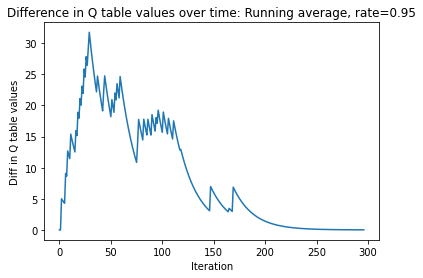

diff in Q reached below 0.01 at iteration = 297


In [ ]:
args.epsilon = 1
qlearn()

0.9


Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

            up       down       left      right
s0   -1.000000  30.846347  -1.000000  72.074086
s1   -1.000000  30.026147  53.359177  93.538918
s2    0.000000   0.000000   0.000000   0.000000
s3   -1.000000  64.338797  98.521912  -1.000000
s4   48.051291  14.263818  -1.000000  46.661649
s5   60.663371  22.553271  31.615264  62.221114
s6   94.766524  51.188947  26.601364  64.098448
s7   81.477691  44.528663  76.033253  -1.000000
s8   29.984800  -1.000000  -1.000000  28.107509
s9   37.988035  -1.000000  18.433739  50.621473
s10  72.373022  -1.000000  25.839800  54.043581
s11  68.505788  -1.000000  

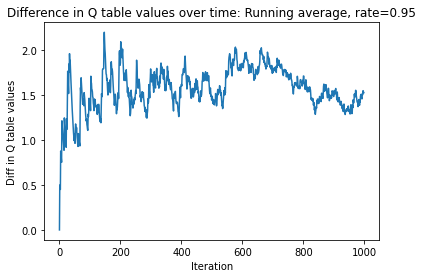

training terminated with iteration 999 with diff in q value 1.5035649221835445 above threshold 0.01


In [ ]:
args.epsilon = 1
args.num_iter = 1000
args.alpha = 0.1
print(1.0-args.alpha)
qlearn()

0.75


Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

            up       down       left      right
s0   -1.000000  71.947685  -1.000000  89.944307
s1   -1.000000  80.419666  80.590193  99.976189
s2    0.000000   0.000000   0.000000   0.000000
s3   -1.000000  80.964974  99.999866  -1.000000
s4   80.411182  59.725847  -1.000000  80.449137
s5   89.801422  69.920960  69.988001  89.494094
s6   99.899661  79.802163  76.633337  80.549573
s7   89.993909  72.632083  89.578772  -1.000000
s8   72.148658  -1.000000  -1.000000  70.700472
s9   78.703742  -1.000000  63.947217  79.661658
s10  89.739556  -1.000000  70.523063  71.420045
s11  80.941857  -1.000000 

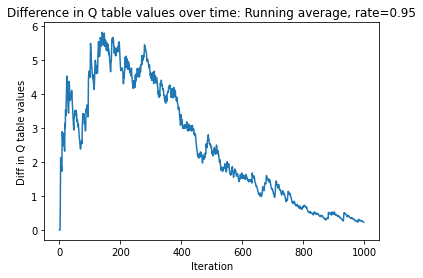

training terminated with iteration 999 with diff in q value 0.21998878588361842 above threshold 0.01


In [ ]:
args.alpha = 0.25
print(1.0-args.alpha)
qlearn()

0.5


Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

            up       down        left      right
s0   -1.000000  72.889357   -1.000000  89.999807
s1   -1.000000  80.943629   80.990031  99.999997
s2    0.000000   0.000000    0.000000   0.000000
s3   -1.000000  80.999982  100.000000  -1.000000
s4   80.988651  65.585546   -1.000000  80.986910
s5   89.975066  72.862766   72.787309  89.998820
s6   99.999237  80.487591   80.997926  80.988236
s7   89.999988  72.894186   89.995408  -1.000000
s8   72.888086  -1.000000   -1.000000  72.881775
s9   80.654877  -1.000000   65.584186  80.992915
s10  89.998208  -1.000000   72.783010  72.888324
s11  80.999848 

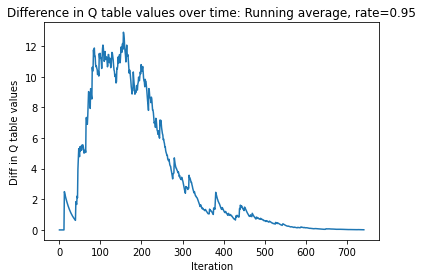

diff in Q reached below 0.01 at iteration = 743


In [ ]:
args.alpha = 0.5
print(1-args.alpha)
qlearn()

0.19999999999999996


Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

            up       down        left       right
s0   -1.000000  72.899957   -1.000000   90.000000
s1   -1.000000  80.999989   80.999996  100.000000
s2    0.000000   0.000000    0.000000    0.000000
s3   -1.000000  81.000000  100.000000   -1.000000
s4   80.999997  65.603560   -1.000000   80.999909
s5   89.999999  72.868524   72.899964   89.999552
s6   99.999998  80.991116   80.999115   80.999924
s7   90.000000  72.900000   89.999943   -1.000000
s8   72.899936  -1.000000   -1.000000   72.899984
s9   80.999997  -1.000000   65.609343   80.998917
s10  89.999944  -1.000000   72.899494

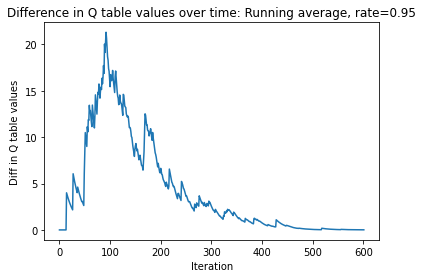

diff in Q reached below 0.01 at iteration = 602


In [ ]:
args.alpha = 0.8
print(1-args.alpha)
qlearn()

0.0
1.0


Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2     0.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90   72.90   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1     8    -1      9
s1   -1     6    10      7
s2    0     0     0      0
s3   -1    13    10     -1
s4    5  

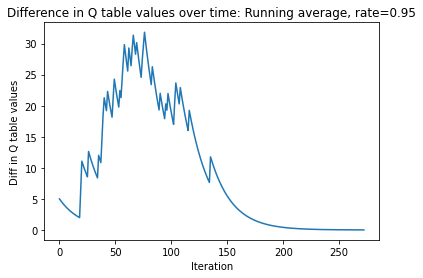

diff in Q reached below 0.01 at iteration = 273


In [ ]:
args.alpha= 1.0
print(1.0-args.alpha)
print(args.alpha)
qlearn()

# Problem 4 (Experiment: 10pts)

**Problem 4 (Experiment: 10 pts):**

Experiment with the $\epsilon$-greedy policy. You don't need to change any code. Just change the parameter and run qlearn(). 

Test with different $\epsilon$ values to see how the $\epsilon$-greedy policy behaves. For example, $\epsilon \in {0.0, 0.1, 0.3, 0.5, 0.8, 0.9, 1.0}$. Note: $\epsilon = 0.0$ is the greedy policy and $\epsilon = 1.0$ is the random policy. ($\epsilon$-greedy chooses the greedy move with $(1-\epsilon)$ probability.).

(1) Which $\epsilon$ value tend to converge fastest? For each $\epsilon$ value, you can run multiple runs (say 5 times) and observe how long it too to converge, and take an average. You can then compare the average. 

(2) How does the number of visits table differ for different $\epsilon$ values? Based on this, how do you think $\epsilon$ affects exploration vs. exploitation? 

(3) Did some $\epsilon$ value lead the algorithm not converging (the final Q table is different from the manually calculated table from Problem 2)? If so, why do you think it did not converge? 




Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up  down  left  right
s0    -1.0   0.0  -1.0    0.0
s1    -1.0   0.0   0.0    0.0
s2     0.0   0.0   0.0    0.0
s3    -1.0   0.0   0.0   -1.0
s4     0.0   0.0  -1.0    0.0
s5     0.0   0.0   0.0    0.0
s6   100.0   0.0   0.0    0.0
s7     0.0   0.0   0.0   -1.0
s8     0.0  -1.0  -1.0    0.0
s9     0.0  -1.0   0.0    0.0
s10   90.0  -1.0   0.0    0.0
s11    0.0  -1.0   0.0   -1.0

Final visit count table

     up  down  left  right
s0   -1    11    -1      0
s1   -1     9     0      0
s2    0     0     0      0
s3   -1    16     0     -1
s4   15     0    -1      0
s5   13     0     0      0
s6

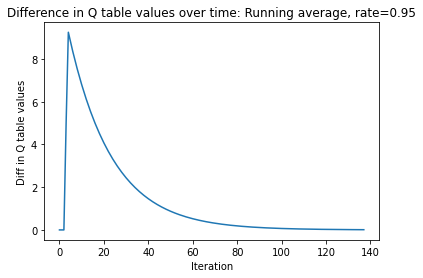

diff in Q reached below 0.01 at iteration = 138


In [ ]:
args.num_iter = 1500
args.epsilon = 0.0
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

         up   down    left  right
s0    -1.00  72.90   -1.00   72.9
s1    -1.00  81.00   65.61  100.0
s2     0.00   0.00    0.00    0.0
s3    -1.00  81.00  100.00   -1.0
s4    65.61  65.61   -1.00   81.0
s5    72.90  72.90   72.90   90.0
s6   100.00  81.00   81.00   81.0
s7    90.00  72.90   90.00   -1.0
s8    72.90  -1.00   -1.00   72.9
s9    81.00  -1.00    0.00   81.0
s10   90.00  -1.00   72.90   72.9
s11   81.00  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1    68    -1      1
s1   -1    32     1     48
s2    0     0     0      0
s3   -1    41    32     -1
s4  

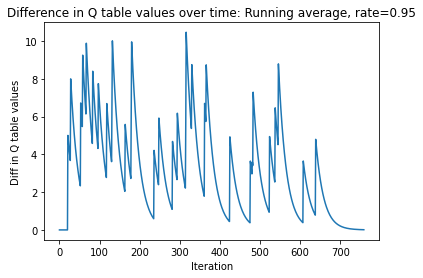

diff in Q reached below 0.01 at iteration = 760


In [ ]:
args.epsilon = 0.1
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2     0.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90    0.00   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1    32    -1     24
s1   -1    16     6     20
s2    0     0     0      0
s3   -1     6    40     -1
s4   14     6    

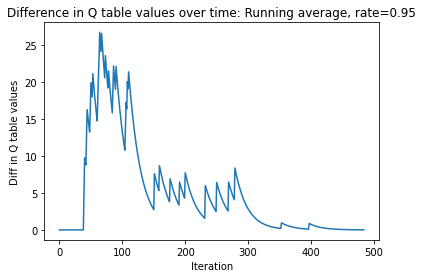

diff in Q reached below 0.01 at iteration = 485


In [ ]:
args.epsilon = 0.3
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2     0.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90   72.90   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1    11    -1     26
s1   -1     7     7     17
s2    0     0     0      0
s3   -1     8    26     -1
s4   25     4    

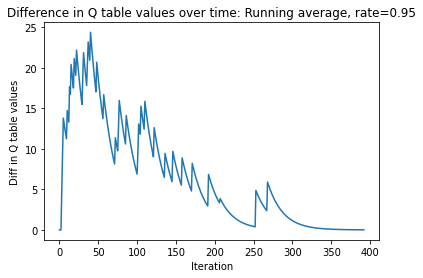

diff in Q reached below 0.01 at iteration = 393


In [ ]:
args.epsilon = 0.5
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2     0.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90   72.90   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1    16    -1     13
s1   -1     3     7      9
s2    0     0     0      0
s3   -1    10    21     -1
s4   10    10    

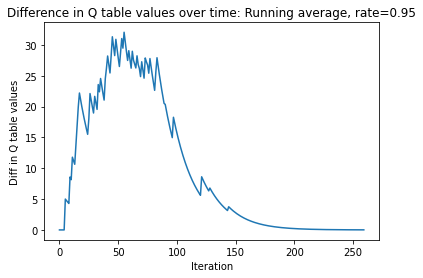

diff in Q reached below 0.01 at iteration = 260


In [ ]:
args.epsilon = 0.8
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2     0.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90   72.90   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1     7    -1     15
s1   -1     4     8      9
s2    0     0     0      0
s3   -1    15    18     -1
s4   20    10    

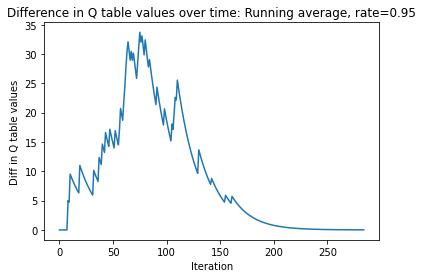

diff in Q reached below 0.01 at iteration = 285


In [ ]:
args.epsilon = 0.9
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2     0.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90   72.90   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1    15    -1     17
s1   -1     6    11      7
s2    0     0     0      0
s3   -1    11    23     -1
s4   13    11    

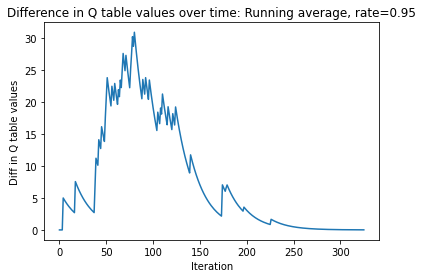

diff in Q reached below 0.01 at iteration = 326


In [ ]:
args.epsilon = 1.0
qlearn()

**Answer**

Run your experiments in the code cell below. 

(1) ϵ= 1.0 converges fastest about 270 iterations, 0.9 takes 310 iterations,0.8 350 iterations,0.5 around 450, 0.3 will take 650 and 0.1 about 750. 0.1 is not converging 

(2) When we increase epsilon value exploration increases in all the states so that each is visited a few no of times. Then those states which lead to high reward is visited more.

(3) 0.0,0.1 is not converging.




Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up    down    left   right
s0    -1.0  59.049   -1.00   90.00
s1    -1.0  81.000   81.00  100.00
s2     0.0   0.000    0.00    0.00
s3    -1.0  81.000  100.00   -1.00
s4    81.0  65.610   -1.00   65.61
s5    90.0  72.900   72.90   90.00
s6   100.0  81.000   81.00   81.00
s7    90.0   0.000   90.00   -1.00
s8    72.9  -1.000   -1.00   72.90
s9     0.0  -1.000   65.61   81.00
s10   90.0  -1.000   72.90   72.90
s11   81.0  -1.000   81.00   -1.00

Final visit count table

     up  down  left  right
s0   -1    36    -1     39
s1   -1    29     2     42
s2    0     0     0      0
s3   -1    23    7

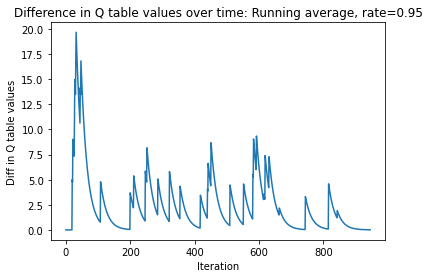

diff in Q reached below 0.01 at iteration = 946


In [ ]:
# You can quickly run multiple experiments without modifying the code above or copying and pasting the whole code. Just do something like this. Create a new code cell for a different experiment.

# Q=(delta>0).astype(float)-1.0 + (delta>0)*np.random.rand(6,4)*0.001   # add small initial random value to break the tie 
args.display_flag = "False"
args.epsilon = 0.1
qlearn()

**Answer:**
(1) ϵ= 1.0 converges fastest about 270 iterations, 0.9 takes 310 iterations,0.8 350 iterations,0.5 around 450, 0.3 will take 650 and 0.1 about 750. 0.1 is not converging 

(2) When we increase epsilon value exploration increases in all the states so that each is visited a few no of times. Then those states which lead to high reward is visited more.

(3) 0.0,0.1 is not converging.




# Problem 5 (Programming: 20pts)

**Problem 5 (Programming: 20)**

Copy and paste the code in Problem 3, and change it to implement SARSA.

Once you're done implementing, run a few experiments to determine whether the original Q learning in Problem 3 works faster, or if the SARSA algorithm works faster (faster to converge, given the same parameter conditions). The results my vary. Please write a detailed description of your experiment and results, and whether you find the simpler SARSA to be faster to converge than the original Q learning. 


Streaming output truncated to the last 5000 lines.
19669th iteration done
19670th iteration done
19671th iteration done
19672th iteration done
19673th iteration done
19674th iteration done
19675th iteration done
19676th iteration done
19677th iteration done
19678th iteration done
19679th iteration done
19680th iteration done
19681th iteration done
19682th iteration done
19683th iteration done
19684th iteration done
19685th iteration done
19686th iteration done
19687th iteration done
19688th iteration done
19689th iteration done
19690th iteration done
19691th iteration done
19692th iteration done
19693th iteration done
19694th iteration done
19695th iteration done
19696th iteration done
19697th iteration done
19698th iteration done
19699th iteration done
19700th iteration done
19701th iteration done
19702th iteration done
19703th iteration done
19704th iteration done
19705th iteration done
19706th iteration done
19707th iteration done
19708th iteration done
19709th iteration done
19710t

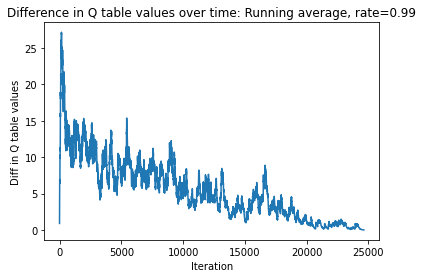

diff in Q reached below 0.01 at iteration = 24633


In [ ]:
#!/usr/bin/python

# qlearn.py : simple discrete, deterministic Q-learning 
#
# Requires: numpy, pandas, matplotlib
#
# Yoonsuck Choe
# choe@tamu.edu
#
# 2021. 02. 17. (wed) 09:00:58 KST
# 2021. 02. 18. (thu) 00:09:00 KST
# 2022. 09. 14. (wed) 12:54:00 CST
#
# Getting started:
# 
# - pick between "console" mode (for command line) or "notebook" mode (for colab, etc). 
#     See the config section.
# 
#     mode  = "console"
#
# Suggested experiments:
#
# - change epsilon: 
#     0.1, 0.25, 0.5 (default), 0.8, 1.0 and see how the Q diff plot looks like (how fast 
#     learning converges.
#    
#     ./qlearn.pl --epsilon=0.25 
#
#     or, for notebook mode
# 
#     args.epsilon = 0.25
#     qlearn()
# 
# - change alpha: 
#     0.1, 0.25, 0.5, 0.8, 1.0 (default) and see how the Q diff plot looks like (how fast 
#     learning converges.
# 
#     ./qlearn.pl --alpha=0.25 
# 
#     or, for notebook mode
# 
#     args.alpha= 0.25
#     qlearn()
# 
# - try a new grid world environment (change section below "Environment set up".
#     search for "modify"
#
#

import numpy as np
import pandas as pd
import random 
import argparse, sys
import matplotlib.pyplot as plt

#--------------------
# config (more config below : search for "modify" 
#
# - for colab, etc, use the "notebook" mode
#--------------------

# mode = "console"
mode = "notebook" 

#--------------------
# console mode: process command line arguments
#--------------------
def parse_args():

  cmd = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
  cmd.add_argument('--alpha', type=float, default="1.0", help="mixing rate")
  cmd.add_argument('--gamma', type=float, default="0.9", help="discount rate")
  cmd.add_argument('--epsilon', type=float, default="0.5", help="discount rate")
  cmd.add_argument('--num_iter', type=int, default="300", help="number of iterations to run")
  cmd.add_argument('--run_avg_rate', type=float, default="0.95", help="number of iterations to run")
  cmd.add_argument('--display_flag', type=str, default="True", help="display Q table after each iteration")
  cmd.add_argument('--run_avg_threshold', type=float, default="0.01", help="run average threshold for training loop termination")

  return cmd.parse_args()

#--------------------
# notebook mode: process command line arguments
#--------------------
class argclass:

  def __init__(self):

    self.alpha = 1.0
    self.gamma = 0.9
    self.epsilon = 0.5
    self.num_iter = 300
    self.run_avg_rate = 0.95
    self.display_flag = "True"
    self.run_avg_threshold = 0.01

#--------------------
# select mode 
#--------------------
if (mode=="console"):

  args = parse_args()

elif (mode=="notebook"):

  args = argclass()

else:

  print("Invalid mode: check the config")
  exit()

#--------------------
# find sum of absolute difference in the two table values
#--------------------
def df_diff(df1, df2):

  d = df1-df2
  return d.abs().to_numpy().sum() 

#----------------------------------------------------------------------------
#
# Environment set up : modify this part to change the environment
#
#----------------------------------------------------------------------------

#--------------------
# state index : modify
#
# layout =  (*) marks the goal. 
# 
# s0 s1 (s2)
# s3 s4 s5 
# 
#   * (s1,right) and (s5,up) has reward 100, all others are 0.
#   * All actions in s2 lead back to s2, with reward 0.
#
#--------------------
s_index = ["s0", "s1", "s2", "s3", "s4", "s5","s6","s7","s8","s9","s10","s11"] 

#--------------------
# state transition table : modify 
#--------------------
delta = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1,-1,2,-1,0,1,2,3,4,5,6,7]),index=s_index),
	  "down" : pd.Series(np.array([4,5,2,7,8,9,10,11,-1,-1,-1,-1]),index=s_index),
	  "left" : pd.Series(np.array([-1,0,2,2,-1,4,5,6,-1,8,9,10]),index=s_index),
	  "right": pd.Series(np.array([1,2,2,-1,5,6,7,-1,9,10,11,-1]),index=s_index)
	}
)

#--------------------
# reward table : modify
#--------------------
reward = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([0, 0,0,0,0,0,100,0,0,0,0,0]),index=s_index),
	  "down" : pd.Series(np.array([ 0,  0,  0, 0, 0, 0,0,0,0,0,0,0]),index=s_index),
	  "left" : pd.Series(np.array([0,  0,  0, 100,0,0,0,0,0,0,0,0]),index=s_index),
	  "right": pd.Series(np.array([ 0,100,0,0,0,0,0,0,0,0,0,0]),index=s_index)
	}
)

print("\n\nDelta")
print(delta)

print("\n\nReward")
print(reward)

#--------------------
# goal state : modify
#--------------------
goal = 2

#----------------------------------------------------------------------------
#
# Main algorithm : no need to modify much below here (for the deterministic case)
#
#----------------------------------------------------------------------------

def qlearn(): 

  # extract number of states
  num_states = len(s_index)
  num_actions = 4
  
  # set up (s,a) visit count
  visits = (delta>=0).astype(int)-1
  run_avg = 0
  
  #--------------------
  # (1) Initialize Q table to zeros (-1 for invalid actions)
  #
  # - Reuse delta table to filter out invalid moves and set others to zero
  #--------------------
 
  Q=(delta>=0).astype(float)-1 

  old_Q = Q.copy(deep=True) 
  
  print("\n\nQ: initial")
  print(Q)
  
  #--------------------
  # (2) Main loop
  #--------------------
  
  d = np.zeros(args.num_iter)
  
  for n in range(args.num_iter):
    
    #----------
    # 1. s : randomly select state   
    #----------
  
    s = random.randint(0,num_states-1)
  
    while (s==goal): # avoid goal state
      s = random.randint(0,num_states-1)
      
    #----------
    # 2. a : choose action (epsilon greedy policy)
    #----------
  
    if (random.random() < (1-args.epsilon)):
  
      # greedy action:
      a = Q.iloc[s,:].argmax()
  
    else:
  
      # random action
      a = random.randint(0,num_actions-1)
  
      while (delta.iloc[s,a]==-1): # avoid invalid action
        a = random.randint(0,num_actions-1)
  
    #----------
    # 3. train
    #----------
  
    visits.iloc[s,a] = visits.iloc[s,a]+1

    alpha = args.alpha
    gamma = args.gamma
  
    # 3.1 find next state from (s,a)
  
    i = 0

    while(s!=goal):
      # we follow epsilon greedy to get a_next
      i+=1
      s_next = delta.iloc[s,a]
      if(random.random()<1-(args.epsilon)+(args.epsilon)*n/args.num_iter or i>300):
        a_next = Q.iloc[s_next,:].argmax()
      else:
        a_next = random.randint(0,num_actions-1)
  
        while (delta.iloc[s_next,a_next]==-1): # avoid invalid action
          a_next = random.randint(0,num_actions-1)

      Q.iloc[s,a] = (1-alpha)*Q.iloc[s,a] + (alpha)*(reward.iloc[s,a] + gamma*Q.iloc[s_next,a_next])
      visits.iloc[s_next,a_next] = visits.iloc[s_next,a_next]+1
      s=s_next
      a=a_next


    print(f"{n}th iteration done")
    d[n] = args.run_avg_rate * run_avg + (1-args.run_avg_rate) * df_diff(Q,old_Q)
    run_avg = d[n]
    old_Q = Q.copy(deep=True)
  


    # 3.3 print current Q and running average of Q diff.
  
    if (args.display_flag == "True"):
  
      print("\nQ : iter="+str(n))
      print(Q)
      print("diff = "+str(d[n]))

    if (n>50  and run_avg < args.run_avg_threshold):

        break
    
  print("\nFinal Q table\n")
  print(Q)
  Value = np.zeros(12)
  for i in range(12):
    Value[i] += Q.iloc[i,:].max()
  print("\nThe value array is:")
  print(Value)
  
  
  print("\nFinal visit count table\n")
  print(visits)

  plt.title("Difference in Q table values over time: Running average, rate="+str(args.run_avg_rate))
  plt.xlabel("Iteration")
  plt.ylabel("Diff in Q table values")
  plt.plot(d[:n])
  plt.show()

  if run_avg < args.run_avg_threshold:
    print(f"diff in Q reached below {args.run_avg_threshold} at iteration = {n}")
  else:
    print(f"training terminated with iteration {n} with diff in q value {run_avg} above threshold {args.run_avg_threshold}")


#-- end of qlearn() function def

#----------------------------------------------------------------------------
# Run the qlearn main function
#
# - if you're using notebook mode, you can change the argument and rerun
#   in the interactive session (create a new cell and put the following lines in it).
#   
#    args.epsilon = 0.8
#    qlearn()
#
#----------------------------------------------------------------------------

args.display_flag = "False"  # Set this to True to see the changing Q table over time.
args.alpha = 0.9
args.run_avg_rate = 0.99
args.epsilon = 0.2
args.num_iter = 25000
qlearn()

# after you run it, check if your Delta (state transition table) and the Reward table are accurate, compared to Figure 1. 



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0
0th iteration done
1th iteration done
2th iteration done
3th iteration done
4th iteration done
5th iteration done
6th iteration done
7th iteration done
8th iteration done
9th iteration done
10th iteration done
11th iteration done
12th iteration done
13th iteration done
14th iteration done
15th iteration done
16th iteration done
17th iteration done
18th iteration done
19th iteration done
20th iteration done
21th iteration done
22th iteration done
23th iteration done
24th iteration done
25th iteration done
26th iteration done
27th iteration done
28th iteration done
29th iteration done
30th iteration done
31th iteratio

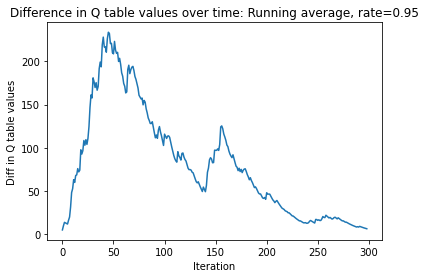

training terminated with iteration 299 with diff in q value 6.045460125965135 above threshold 0.01


In [ ]:
args.num_iter = 300
args.epsilon = 1
args.run_avg_rate = 0.95
args.alpha = 1
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0
0th iteration done
1th iteration done
2th iteration done
3th iteration done
4th iteration done
5th iteration done
6th iteration done
7th iteration done
8th iteration done
9th iteration done
10th iteration done
11th iteration done
12th iteration done
13th iteration done
14th iteration done
15th iteration done
16th iteration done
17th iteration done
18th iteration done
19th iteration done
20th iteration done
21th iteration done
22th iteration done
23th iteration done
24th iteration done
25th iteration done
26th iteration done
27th iteration done
28th iteration done
29th iteration done
30th iteration done
31th iteratio

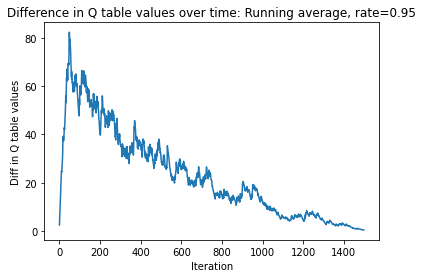

training terminated with iteration 1499 with diff in q value 0.42567514910518406 above threshold 0.01


In [ ]:
args.num_iter = 1500
args.epsilon = 1
args.run_avg_rate = 0.95
args.alpha = 0.5
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0
0th iteration done
1th iteration done
2th iteration done
3th iteration done
4th iteration done
5th iteration done
6th iteration done
7th iteration done
8th iteration done
9th iteration done
10th iteration done
11th iteration done
12th iteration done
13th iteration done
14th iteration done
15th iteration done
16th iteration done
17th iteration done
18th iteration done
19th iteration done
20th iteration done
21th iteration done
22th iteration done
23th iteration done
24th iteration done
25th iteration done
26th iteration done
27th iteration done
28th iteration done
29th iteration done
30th iteration done
31th iteratio

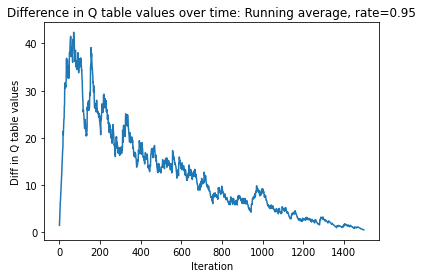

training terminated with iteration 1499 with diff in q value 0.525323725872296 above threshold 0.01


In [ ]:
args.num_iter = 1500
args.epsilon = 1
args.run_avg_rate = 0.95
args.alpha = 0.3
qlearn()



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0
0th iteration done
1th iteration done
2th iteration done
3th iteration done
4th iteration done
5th iteration done
6th iteration done
7th iteration done
8th iteration done
9th iteration done
10th iteration done
11th iteration done
12th iteration done
13th iteration done
14th iteration done
15th iteration done
16th iteration done
17th iteration done
18th iteration done
19th iteration done
20th iteration done
21th iteration done
22th iteration done
23th iteration done
24th iteration done
25th iteration done
26th iteration done
27th iteration done
28th iteration done
29th iteration done
30th iteration done
31th iteratio

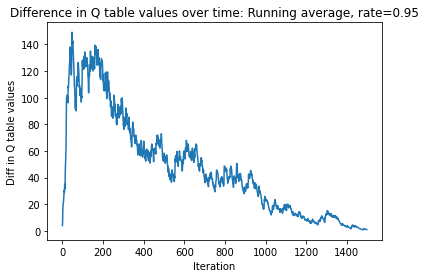

training terminated with iteration 1499 with diff in q value 0.9563535422848309 above threshold 0.01


In [ ]:
args.num_iter = 1500
args.epsilon = 1
args.run_avg_rate = 0.95
args.alpha = 0.8
qlearn()

**Answer**

Clearly q learning converges faster than SARSA. We implement sarsa with a linear epsilon since it is proven to converge given it goes to each state a few no of times.
We took multiple comparisons but we show epsilon 1 and alpha 1 whhere q learning converges before 300 iterations but SARSA DOESNT.

We apply alpha 1, 0.5 and 0.3. In each case Q learning converges faster than SARSA.



# Section II. Stochastic Case (total 30 points)

Consider a stochastic version of the reinforcement learning problem posed in Section 1 (figure copied below). Modify the rules so that:

* $\delta(s,a)$ is stochastic: The probability of landing in the intended direction is $0.70$. The probability of landing in one of $n$ unintended legal direction is $\frac{0.30}{n}$.

  * Example 1 : If you are in $s_0$ and action $a$ was $right$, probability of landing in $s_1$ is 0.70, and ending up in $s_4$ is 0.3. 
    * Note that $\delta(s_0,right)=s_1$ and $\delta(s_0,down)=s_4$, respectively.

  * Example 2: If you are in $s_1$ and $a$ was $down$, probability of landing in $s_5$ is 0.70, ending up in $s_0$ is 0.15 (= 0.3/2), and ending up in $s_2$ is 0.15 (= 0.3/2). 
    * Note that in the deterministic case, $\delta(s_1,down)=s_5$, $\delta(s_1,left)=s_0$,   and $\delta(s_1,right)=s_2$, respectively.

  * Example 3: If you are in $s_6$ and $a$ was $left$, probability of landing in $s_5$ is 0.70, ending up in $s_2$ is 0.1 (= 0.3/3), ending up in $s_7$ is 0.1 (= 0.3/3), and ending up in $s_{10}$ is 0.1 (= 0.3/3)
    * Note that in the deterministic case, $\delta(s_6,left)=s_5$, $\delta(s_6,up)=s_2$, $\delta(s_6,right)=s_{7}$, and $\delta(s_6,down)=s_{10}$, respectively.

* Reward $r(s,a)$ depends on where you landed based on the above. All rewards are 0 unless the resulting state was the goal state $s_2$. For example, if you were in $s_3$ and the action was $a=down$, with 15\% chance you will land in $s_2$, the goal state. In this case, $\delta(s_3,down)=s_2$, and thus $r(s_3, right) = 100$ for that specific run. In a different run, with the same action $right$, if you landed in $s_{7}$, then $r(s_3,down) = 0$. So, $r(s_3,down)$ can be either 0 or 100, depending on the random outcome.

<figure>
<center>
<img src="https://github.com/yschoe/pub-data/blob/main/grid-goal2-v2.png?raw=true">
<figcaption>Figure 2: same as Figure 1 </figcaption></center>
</figure>




# Problem 6 (Program: 20pts)

**Problem 6 (Program: 20 pts):**

Modify the program in problem 3, so that the environment acts stochastically, as defined in Section II. The code below shows how to generate random outcomes with a certain probability. 

The learning rule has to be modified to the one shown in slide04-rl.pdf, page 35. 

> $\hat{Q}_n(s,a) \leftarrow (1-\alpha_n) \hat{Q}_{n-1}(s,a) + \alpha_n \left[ r + \gamma \max_{a'} \hat{Q}_{n-1}(s',a') \right],$ 
> 
> where $\alpha_n = \frac{1}{1+visits_s(s,a)}$

(1) Modify the code from problem 3.

(2) Run the experiment, and show the resulting $Q$ table. You should experiment with the $\alpha$ parameter to get the correct result. Use the random policy. $\gamma = 0.9$, as usual.  


(3) Set up another table Sum_Ersa to compute the sum of all reward you observed when visiting the $(s,a)$ pairs. This table should be the same size as the Q table. When a specific state action pair is visited ($(s,a)$ is "visited", when $s$ and $a$ are randomly generated in the main loop, to update $Q(s,a)$), say $(s_4, right)$, observe the reward ($r$), and add it to the appropriate Sum_Ersa location:
```
Sum_Ersa.iloc[5,3] = r + Sum_Ersa.iloc[5,3]    # Note: (index of s1 is 2, and index of right is 1)
```
or
```
Sum_Ersa.loc["s1","down"] = r + Sum_Ersa.loc["s1","down"]    # Using loc, instead of iloc.
```
Finally, after your training terminates, compute an estimate of $E[r(s,a)]$, based on the Sum_Ersa  table and the visits table (this visits table is already implemented). 

> $E[r(s,a)] \sim \frac{\sum_{\forall \mbox{visits to } (s,a)} (\mbox{observed  reward }, r)}{\mbox{visits}(s,a)}$

Store the results in a table named:
```
Ersa = ...
```

Print out the results.

(4) Compare $E[r(s_6,right)]$ with the manually computed value from Problem 7 (below). Are they comparable?


**Answer:**

(1) Write your code in the code cell below.
ALL ANSWERS ARE IN THE OUTPUT. PLEASE KINDLY CHECK

(2)

(3)

(4)





Delta
     up  down  left  right
s0   -1     4    -1      1
s1   -1     5     0      2
s2    2     2     2      2
s3   -1     7     2     -1
s4    0     8    -1      5
s5    1     9     4      6
s6    2    10     5      7
s7    3    11     6     -1
s8    4    -1    -1      9
s9    5    -1     8     10
s10   6    -1     9     11
s11   7    -1    10     -1


Reward
      up  down  left  right
s0     0     0     0      0
s1     0     0     0    100
s2     0     0     0      0
s3     0     0   100      0
s4     0     0     0      0
s5     0     0     0      0
s6   100     0     0      0
s7     0     0     0      0
s8     0     0     0      0
s9     0     0     0      0
s10    0     0     0      0
s11    0     0     0      0


Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2   0.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8 

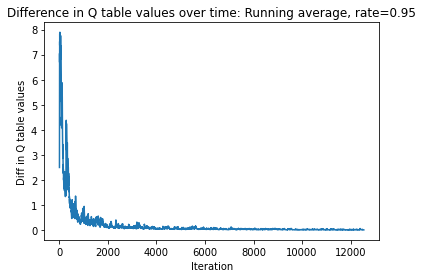

diff in Q reached below 0.01 at iteration = 12547


In [ ]:

import numpy as np
import pandas as pd
import random 
import argparse, sys
import matplotlib.pyplot as plt

#--------------------
# config (more config below : search for "modify" 
#
# - for colab, etc, use the "notebook" mode
#--------------------

# mode = "console"
mode = "notebook" 

#--------------------
# console mode: process command line arguments
#--------------------
def parse_args():

  cmd = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
  cmd.add_argument('--alpha', type=float, default="1.0", help="mixing rate")
  cmd.add_argument('--gamma', type=float, default="0.9", help="discount rate")
  cmd.add_argument('--epsilon', type=float, default="0.5", help="discount rate")
  cmd.add_argument('--num_iter', type=int, default="300", help="number of iterations to run")
  cmd.add_argument('--run_avg_rate', type=float, default="0.95", help="number of iterations to run")
  cmd.add_argument('--display_flag', type=str, default="True", help="display Q table after each iteration")
  cmd.add_argument('--run_avg_threshold', type=float, default="0.01", help="run average threshold for training loop termination")

  return cmd.parse_args()

#--------------------
# notebook mode: process command line arguments
#--------------------
class argclass:

  def __init__(self):

    self.alpha = 1.0
    self.gamma = 0.9
    self.epsilon = 0.5
    self.num_iter = 300
    self.run_avg_rate = 0.95
    self.display_flag = "True"
    self.run_avg_threshold = 0.01

#--------------------
# select mode 
#--------------------
if (mode=="console"):

  args = parse_args()

elif (mode=="notebook"):

  args = argclass()

else:

  print("Invalid mode: check the config")
  exit()

#--------------------
# find sum of absolute difference in the two table values
#--------------------
def df_diff(df1, df2):

  d = df1-df2
  return d.abs().to_numpy().sum() 

#----------------------------------------------------------------------------
#
# Environment set up : modify this part to change the environment
#
#----------------------------------------------------------------------------

#--------------------
# state index : modify
#
# layout =  (*) marks the goal. 
# 
# s0 s1 (s2)
# s3 s4 s5 
# 
#   * (s1,right) and (s5,up) has reward 100, all others are 0.
#   * All actions in s2 lead back to s2, with reward 0.
#
#--------------------
s_index = ["s0", "s1", "s2", "s3", "s4", "s5","s6","s7","s8","s9","s10","s11"] 

#--------------------
# state transition table : modify 
#--------------------
delta = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1,-1,2,-1,0,1,2,3,4,5,6,7]),index=s_index),
	  "down" : pd.Series(np.array([4,5,2,7,8,9,10,11,-1,-1,-1,-1]),index=s_index),
	  "left" : pd.Series(np.array([-1,0,2,2,-1,4,5,6,-1,8,9,10]),index=s_index),
	  "right": pd.Series(np.array([1,2,2,-1,5,6,7,-1,9,10,11,-1]),index=s_index)
	}
)
sum_ersa = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.zeros(12),index=s_index),
	  "down" : pd.Series(np.zeros(12),index=s_index),
	  "left" : pd.Series(np.zeros(12),index=s_index),
	  "right": pd.Series(np.zeros(12),index=s_index)
	}
)
ersa = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.zeros(12),index=s_index),
	  "down" : pd.Series(np.zeros(12),index=s_index),
	  "left" : pd.Series(np.zeros(12),index=s_index),
	  "right": pd.Series(np.zeros(12),index=s_index)
	}
)

#--------------------
# reward table : modify
#--------------------
reward = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([0, 0,0,0,0,0,100,0,0,0,0,0]),index=s_index),
	  "down" : pd.Series(np.array([ 0,  0,  0, 0, 0, 0,0,0,0,0,0,0]),index=s_index),
	  "left" : pd.Series(np.array([0,  0,  0, 100,0,0,0,0,0,0,0,0]),index=s_index),
	  "right": pd.Series(np.array([ 0,100,0,0,0,0,0,0,0,0,0,0]),index=s_index)
	}
)

print("\n\nDelta")
print(delta)

print("\n\nReward")
print(reward)

#--------------------
# goal state : modify
#--------------------
goal = 2

#----------------------------------------------------------------------------
#
# Main algorithm : no need to modify much below here (for the deterministic case)
#
#----------------------------------------------------------------------------

def qlearn(): 

  # extract number of states
  num_states = len(s_index)
  num_actions = 4
  
  # set up (s,a) visit count
  visits = (delta>=0).astype(int)-1
  run_avg = 0
  
  #--------------------
  # (1) Initialize Q table to zeros (-1 for invalid actions)
  #
  # - Reuse delta table to filter out invalid moves and set others to zero
  #--------------------
 
  Q=(delta>=0).astype(float)-1 

  old_Q = Q.copy(deep=True) 
  
  print("\n\nQ: initial")
  print(Q)
  
  #--------------------
  # (2) Main loop
  #--------------------
  
  d = np.zeros(args.num_iter)
  
  for n in range(args.num_iter):
    
    #----------
    # 1. s : randomly select state   
    #----------
  
    s = random.randint(0,num_states-1)
  
    while (s==goal): # avoid goal state
      s = random.randint(0,num_states-1)
      
    #----------
    # 2. a : choose action (epsilon greedy policy)
    #----------
  
    if (random.random() < (1-args.epsilon)):
  
      # greedy action:
      a = Q.iloc[s,:].argmax()
  
    else:
  
      # random action
      a = random.randint(0,num_actions-1)
  
      while (delta.iloc[s,a]==-1): # avoid invalid action
        a = random.randint(0,num_actions-1)
  
    #----------
    # 3. train
    #----------
  
    visits.iloc[s,a] = visits.iloc[s,a]+1

    alpha = args.alpha
    gamma = args.gamma
  
    # 3.1 find next state from (s,a)
    s_next = delta.iloc[s,a]
    invalid_states = np.count_nonzero(delta.iloc[s,:]==-1)
    p = np.zeros(4)
    for i in range(4):
      if(delta.iloc[s,i]==-1):
         p[i]=0
      elif i==a:
        p[i]=0.7
      else:
        p[i] = 0.3/(4-1-invalid_states)
    
    #pick the actual action
  
    while (True):
      a_actual = random.randint(0,3) # generate rondom event "a"
      r = random.random()  

      if (r <= p[a_actual]):  
        # accept event "a"!
        break
      else:
        # reject event "a" and repeat
        continue
    s_next = delta.iloc[s,a_actual]
    alpha = 1.0/(1+visits.iloc[s,a])
    sum_ersa.iloc[s,a] += reward.iloc[s,a_actual]





  
    # 3.2 update Q
  
    # Equation is: Q(s,a) = (1-alpha) x Q(s,a) + alpha*( r(s,a) + gamma * max_a' Q(s',a') )
    Q.iloc[s,a] = ((1.0)-(alpha))*Q.iloc[s,a] + (alpha)*(reward.iloc[s,a_actual] + gamma*Q.iloc[s_next,:].max())
  
  
    # 3.3 compute running average of the sum of Q(n) minus Q(n-1)
  
    d[n] = args.run_avg_rate * run_avg + (1-args.run_avg_rate) * df_diff(Q,old_Q)
    run_avg = d[n]
    old_Q = Q.copy(deep=True)
   


    # 3.3 print current Q and running average of Q diff.
  
    if (args.display_flag == "True"):
  
      print("\nQ : iter="+str(n))
      print(Q)
      print("diff = "+str(d[n]))

    if (n>50  and run_avg < args.run_avg_threshold):
 
        break

  #--------------------
  # (3) Print final Q table  and (s,a) visit count table
  #--------------------
  print("\nFinal Q table\n")
  print(Q)
  
  print("\nFinal visit count table\n")
  print(visits)

  print("\n Final Sum_ersa table")
  print(sum_ersa)

  print("\Final ersa values")
  for s in range(12):
    for a in range(4):
      ersa.iloc[s,a] = sum_ersa.iloc[s,a]/max(1,visits.iloc[s,a])

  print(ersa)
  
 


  
  
  #--------------------
  # (4) Plot diff Q(n), Q(n-1) running average
  #--------------------
  plt.title("Difference in Q table values over time: Running average, rate="+str(args.run_avg_rate))
  plt.xlabel("Iteration")
  plt.ylabel("Diff in Q table values")
  plt.plot(d[:n])
  plt.show()

  if run_avg < args.run_avg_threshold:
    print(f"diff in Q reached below {args.run_avg_threshold} at iteration = {n}")
  else:
    print(f"training terminated with iteration {n} with diff in q value {run_avg} above threshold {args.run_avg_threshold}")

#-- end of qlearn() function def

#----------------------------------------------------------------------------
# Run the qlearn main function
#
# - if you're using notebook mode, you can change the argument and rerun
#   in the interactive session (create a new cell and put the following lines in it).
#   
#    args.epsilon = 0.8
#    qlearn()
#
#----------------------------------------------------------------------------

args.display_flag = "False"  # Set this to True to see the changing Q table over time.
args.epsilon = 0.2
args.num_iter = 15000
qlearn()

# after you run it, check if your Delta (state transition table) and the Reward table are accurate, compared to Figure 1. 

(array([196.,   0.,   0., 103.,   0.,   0.,   0., 415.,   0.,   0., 286.]),
 array([0.        , 0.27272727, 0.54545455, 0.81818182, 1.09090909,
        1.36363636, 1.63636364, 1.90909091, 2.18181818, 2.45454545,
        2.72727273, 3.        ]),
 <a list of 11 Patch objects>)

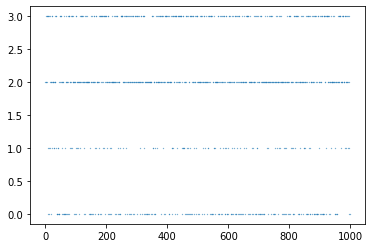

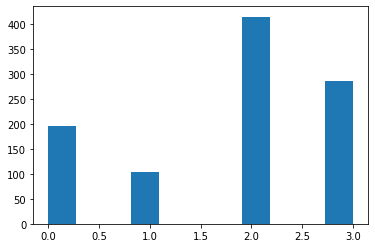

In [ ]:
# Rejection method example code

import numpy as np
import matplotlib.pyplot as plt
import random

# 1. set up probability for 4 events
P = np.array([0.2, 0.1, 0.4, 0.3])

# 2. function definition: generate random event : returns 
def random_event(p):
  
  while (True):

    a = random.randint(0,3) # generate rondom event "a"
    r = random.random()  

    if (r <= p[a]):  
      # accept event "a"!
      return a
    else:
      # reject event "a" and repeat
      continue

# 3. simulation 

n = 1000

outcome = np.zeros(n)

for i in range(n):
  outcome[i] = random_event(P)

# 4. plot sampled events
fig=plt.figure()
plt.plot(outcome,".",markersize=0.5)

# 5. plot histogram : Note: for event 0, 1, 2, 3, the count would be around 200, 100, 400, and 300. 

fig2=plt.figure()
plt.hist(outcome,bins='auto')



# Problem 7 & 8 (Written: 10 pts)

**Problem 7 (written: 5 pts)**

Compute $E[r(s_6,right)]$ by hand, given the above info (Figure 2, and the description).

$E[\cdot]$ is the expected value operator. $E[X] = \sum_{i=0}^n x_i p_i $, where $X$ is a random variable, $x_i$ ($i=0 .. n$) is a value $X$ can take, and $p_i$ is the probability of observing $x_i$.  

So, to compute $E[r(s_6,right)]$, you need to find all possible reward values ($x_i$) and their probabilities ($p_i$), then plug it into the above equation. See Figure 2 (right) to find these values.


1.  ersa[s6,right] = 0.7*0 + 0.3/3 * 100 + 2*0.3/3*0 = 10


**Problem 8 (Written: 5 pts):**

Using the simulation results from Problem 6, show that the following relationship holds, approximately.


For $s=s_6, a=right$, verify if the following equation in slide04-rl.pdf page 34 is approximately accurate. 


> $ Q(s,a) =      E[r(s,a)] + \gamma \sum_{s'} P(s'|s,a) \max_{a'} Q(s',a') $

For this, on the left hand side, you will simply look up your $Q$ table. The $P(s'|s,a)$ are defined in the beginning of Section II: It is 0.70 for the intended direction, and 0.1, 0.15, or 0.3 for unintended directions, depending on the number of legal moves from $s$.

```
Q.iloc[s,a] = 64.74
```

On the right hand side, you will compute 

```
Ersa.iloc[s,a] + args.gamma * ( .... + p * Q.iloc[s_prime,:].max() + .... )  
= (0.7*Q.iloc[s7,:].max() + 0.1*Q.iloc[s2,:].max() + 0.1*Q.iloc[s5,:],max() + 0.1*Q.iloc[s10,:].max())*0.9 + E(r(s6,right)]
= (0.7*74.04+0.1*70.28+0+0.1*68.31)*0.9 + 8.77 
= 67.88

# p = 0.7, if s_prime was in the intended direction, and 
# p = 0.1 or 0.15 or 0.3, for unintended direction, depending on the number of
# legal moves from s.  
``` 
Verify the above two are nearly identical. 
1. Q.iloc[s,a]
2. Ersa.iloc[s,a] + args.gamma * ( ....+ p * Q.iloc[s_prime,:].max() + .... )    



In [ ]:
(0.7*74.04+0.1*70.28+0+0.1*68.31)*0.9 + 8.77 

67.8883